In [1]:
import gzip
import os 
from os.path import isfile, join 
import numpy as np 

In [35]:
mnist_path = './mnist_raw/'

In [36]:
def list_files(path: str) -> None:
    return [join(path, f) for f in os.listdir(path) if isfile(join(path,f))]

In [37]:
list_files(path = mnist_path)

['./mnist_raw/t10k-images-idx3-ubyte.gz',
 './mnist_raw/t10k-labels-idx1-ubyte.gz',
 './mnist_raw/train-images-idx3-ubyte.gz',
 './mnist_raw/train-labels-idx1-ubyte.gz']

In [15]:
for f in list_files(path = mnist_path):
    print(f)

./mnist_raw/t10k-images-idx3-ubyte.gz
./mnist_raw/t10k-labels-idx1-ubyte.gz
./mnist_raw/train-images-idx3-ubyte.gz
./mnist_raw/train-labels-idx1-ubyte.gz


In [38]:
def get_images(path: str) -> None:
    for f in list_files(path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big') # esta variable no interesa ya que es un magic number segun la documentación
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
                
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    
    return x_train, y_train, x_test, y_test 
                

In [39]:
x_train, y_train, x_test, y_test = get_images(path=mnist_path)

In [40]:
print(f'Shape of X_Train = {x_train.shape}')
print(f'Shape of Y_Train = {y_train.shape}')
print(f'Shape of X_Test = {x_test.shape}')
print(f'Shape of Y_Test = {y_test.shape}')

Shape of X_Train = (60000, 28, 28)
Shape of Y_Train = (60000,)
Shape of X_Test = (10000, 28, 28)
Shape of Y_Test = (10000,)


In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline 


def plot_number(image: str) -> None:
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')

La imagen mostrada corresponde a un: 9


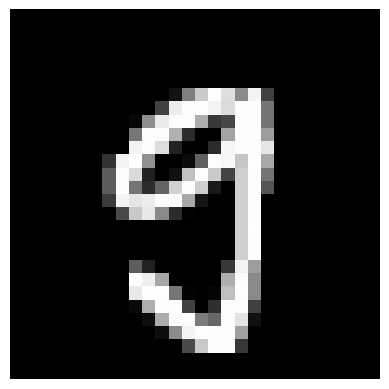

In [31]:
# se puede ejecutar varias veces para obtener de forma random un numero en la salida

rand_idx = np.random.randint(len(y_test))
print(f'La imagen mostrada corresponde a un: {y_test[rand_idx]}')

plot_number(image= x_test[rand_idx])